In [1]:
class Node:
    """A class representing a node in a double linked list."""
    def __init__(self, data=None):
        """
        Initializes a new Node instance.
        
        Parameters:
        data: The data to be stored in the node. Defaults to None.
        """
        self.data = data
        self.next = None
        self.before = None


class LinkedList:
    """A class representing a singly linked list."""
    def __init__(self):
        """Initializes a new LinkedList instance with a head and tail pointing to None."""
        self.head = None
        self.end = None

    def append(self, data):
        """
        Appends a new node with the specified data to the end of the list.
        
        Parameters:
        data: The data to be stored in the new node.
        """
        new_node = Node(data)
        if not self.head:
            self.head = new_node
        else:
            current = self.head
            while current.next:
                current = current.next
            new_node.before = current
            current.next = new_node

    def delete(self, data):
        """
        Deletes the first node with the specified data from the list.
        
        Parameters:
        data: The data of the node to be deleted.
        """
        current=self.head
        while current:
            if current.data == data:
                if current.before:
                    current.before.next = current.next
                if current.next:
                    current.next.before = current.before
                return
            current = current.next
        return f"Didn't find data {data}"

    def get(self, index):
        """
        Gets the data of the node at the specified index.
        
        Parameters:
        index: The index of the node.
        
        Returns:
        The data of the node at the specified index, or None if index is out of bounds.
        """
        current = self.head
        i = 0

        while current and i < index:
            current = current.next
            i += 1

        if current:
            return current.data
        else:
            return None

    def insert(self, data, index):
        """
        Inserts a new node with the specified data at the specified index.
        
        Parameters:
        data: The data to be stored in the new node.
        index: The index at which to insert the new node.
        """
        new_node = Node(data)
        if index == 0:
            new_node.next = self.head
            if self.head:
                self.head.before = new_node
            self.head = new_node
        else:
            current = self.head
            i = 0
            while current and i < index - 1:
                current = current.next
                i += 1
            if current:
                new_node.next = current.next
                if current.next:
                    current.next.before = new_node
                current.next = new_node
                new_node.before = current

In [2]:
# Create a new linked list
my_list = LinkedList()

# Append some data to the list
my_list.append(1)
my_list.append(2)
my_list.append(3)
my_list.append(4)

# Print the initial list
# It should contain: 1 <-> 2 <-> 3 <-> 4
current = my_list.head
while current:
    print(current.data, end=" <-> ")
    current = current.next
print("None")

# Test the delete method
my_list.delete(3)
my_list.delete(1)

# Print the updated list
# It should contain: 2 <-> 4
current = my_list.head
while current:
    print(current.data, end=" <-> ")
    current = current.next
print("None")

# Test the get method
data_at_index_0 = my_list.get(0)  # Should return 2
data_at_index_1 = my_list.get(1)  # Should return 4
data_at_index_2 = my_list.get(2)  # Should return None (out of bounds)

print(f"Data at index 0: {data_at_index_0}")
print(f"Data at index 1: {data_at_index_1}")
print(f"Data at index 2: {data_at_index_2}")

# Test the insert method
my_list.insert(5, 0)  # Insert 5 at the beginning
my_list.insert(3, 2)  # Insert 3 at index 2

# Print the final list
# It should contain: 5 <-> 2 <-> 3 <-> 4
current = my_list.head
while current:
    print(current.data, end=" <-> ")
    current = current.next
print("None")


1 <-> 2 <-> 3 <-> 4 <-> None
1 <-> 2 <-> 4 <-> None
Data at index 0: 1
Data at index 1: 2
Data at index 2: 4
5 <-> 1 <-> 3 <-> 2 <-> 4 <-> None


In [7]:
import timeit

# Define a function to test access time in a doubly linked list
def test_linked_list_access():
    return my_list.get(900)  # Access the element at index 900

# Define a function to test access time in an array
def test_array_access():
    return my_array[900]  # Access the element at index 900

my_list = LinkedList()  # Create a new linked list
for i in range(1000):
    my_list.append(i)  # Append 1000 elements
my_array = [i for i in range(1000)]  # Create an array with 1000 elements

# Measure the time taken to access elements in a doubly linked list
linked_list_time = timeit.timeit(test_linked_list_access, number=1000)

# Measure the time taken to access elements in an array
array_time = timeit.timeit(test_array_access, number=1000)

print(f"Time taken to access an element in a doubly linked list: {linked_list_time:.6f} seconds")
print(f"Time taken to access an element in an array: {array_time:.6f} seconds")


Time taken to access an element in a doubly linked list: 0.073924 seconds
Time taken to access an element in an array: 0.000072 seconds


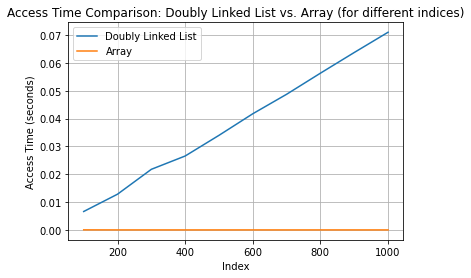

In [12]:
import timeit
import matplotlib.pyplot as plt

# Define a function to test access time in a doubly linked list
def test_linked_list_access(index):
    return my_list.get(index)

# Define a function to test access time in an array
def test_array_access(index):
    return my_array[index]

# Initialize lists to store execution times
linked_list_times = []
array_times = []

# Vary the size of the data structure and measure access times for different indices
indices = range(100, 1001, 100)
for index in indices:
    my_list = LinkedList()  # Create a new linked list
    for i in range(1001):
        my_list.append(i)

    my_array = [i for i in range(1001)]  # Create an array with 1000 elements

    # Measure the time taken to access an element in a doubly linked list
    linked_list_time = timeit.timeit(lambda: test_linked_list_access(index), number=1000)
    linked_list_times.append(linked_list_time)

    # Measure the time taken to access an element in an array
    array_time = timeit.timeit(lambda: test_array_access(index), number=1000)
    array_times.append(array_time)

# Create a plot to compare access times for different indices
plt.figure()
plt.plot(indices, linked_list_times, label='Doubly Linked List')
plt.plot(indices, array_times, label='Array')
plt.xlabel('Index')
plt.ylabel('Access Time (seconds)')
plt.legend()
plt.title('Access Time Comparison: Doubly Linked List vs. Array (for different indices)')
plt.grid(True)
plt.show()
